# <center> Possibility of liquid oceans on the moons of gas giants </center>

<center>
    Starter code
    
    2023-11-04
    
</center>

In [1]:
import numpy as np

In [2]:
G = 6.67430 * 10**(-11)

def get_G():
    return G

get_G()

6.6743e-11

In [3]:
def E_flux_tidal (M_h, R, w, a, e, K):
    
    G = 6.67430 * 10**(-11)
    
    return K*(21/2)*(G*M_h**2*R**2*w*e**2)/a**6

In [4]:
# Sample values inspired from Europa

M_h = 1.8987*10**27 # Jupiter's mass, kg
R = 1560*10**3 # Europa radius, m
v_avg = 13743.36 # m/s
a = 670900*10**3 # average orbital radius, m
w = v_avg/a
e = 0.009
K = 0.02 # "love number for frozen interior, article2"
T_period = 3.551181*24*3600 # s

E_flux_tidal(M_h, R, w, a, e, K) # in J/s


2.237485937083581e-06

In [5]:
def heat_required(V, delta_T):
    '''
    V: volume in m3
    delta_T: temperature difference in K
    returns in J
    '''    
    c = 4.18*10**3 # J/(kg*K) (heat capacity of water)
    p = 10**3 # kg/m3 (density of water)
    
    
    return c*p*V*delta_T

In [6]:
heat_required(3*10**3, 273-50)

2796420000000.0

# Our model: melting a thick layer of ice

In [7]:
# Sample values based on Europa

thickness_ice_0 = 100*10**3 # m
R_total = 1550*10**3 # m

T_ice = 100 # K
T_melt = 273 # assumption for now

heat_cap = 4.18 #kJ/(kg*K)

In [8]:
def F_g_shell (M_body, M_shell, r):
    
    return G*M_body*M_shell/r**2

New plan

## Melting a 1m^2 column vs a sphere of ice

Assumptions:
* Heat due to conduction only
* Assume material parameters are constant
* Don't consider phase change yet; just looking at temperature distribution over time

In [9]:
N = 100 # number of layers
R_ice_0 = 100*10**3 # m
delta_r = R_ice_0/N

R_body = 1450*10**3 # m


# Update arrays:

r_arr = np.arange(R_body, R_body+R_ice_0, delta_r)


T_layer = np.zeros(N)+100 # all start at 100 K

Net_Q_dot = np.zeros(N)

E_dot = E_flux_tidal(M_h, R, w, a, e, K)


delta_t = 10**9 # timescale of millions of years


A_column = np.zeros(N)+1
A_sphere = 4*np.pi*r_arr**2 # dun increa that much

Materials parameters

In [92]:
# Sources:
# https://www.engineeringtoolbox.com/ice-thermal-properties-d_576.html
# https://www.desmos.com/calculator/wicmrvrznj?lang=ru

def get_c_p(T):
    
    return 833 # J/kg.K (SI)

def get_k_t(T):
    return 3.48*10**3 # W/K

def get_rho(i):
    return 925.7 # kg/m3

In [11]:
def calc_mass_shell(R_body, R_shell, rho_ice):
    
    return rho_ice/4*np.pi*R_body**2*R_shell

Quick calc: melting all the ice at once...

In [12]:
m_shell_tot = calc_mass_shell(R_body, R_ice_0, get_rho(0))

approx_time_to_melt = get_c_p(0)*(m_shell_tot)*(273-100)/E_dot
approx_time_to_melt/(24*3600*365) # trillion trillion years -> way more than universe (too long!)

3.121909668795541e+23

In [13]:
# Equations

def get_Q_dot(i):
    
    return get_k_t(i-1)*A_sphere[i]*(T_layer[i]-T_layer[i-1])/delta_r

def get_delta_T(i):
    
    return Net_Q_dot[i]*delta_t/(get_c_p(T_layer[i])*A_sphere[i]*delta_r*get_rho(0))


In [14]:
# updates

for t in range(100):

    Net_Q_dot[0] = E_dot - get_Q_dot(1)
    Net_Q_dot[N-1] = get_Q_dot(N-1)

    for i in range(1, N-1):

        Net_Q_dot[i] = get_Q_dot(i) - get_Q_dot(i+1)
        
    # print(Net_Q_dot)

    for i in range(N):
        T_layer[i] += get_delta_T(i)

In [15]:
T_layer

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100.])

In [16]:
get_delta_T(i)

0.0

In [51]:
def get_Q_dot_2(i, A):
    
    print("get_Q_dot", get_k_t(i-1),A,(T_layer[i-1]-T_layer[i]),delta_r)
    
    return get_k_t(i-1)*A*(T_layer[i-1]-T_layer[i])/delta_r

def get_delta_T_2(Net_Q_dot, A):
    
    # print(Net_Q_dot, delta_t, get_c_p(0), A, delta_r, get_rho(0))
    
    return Net_Q_dot*delta_t/(get_c_p(0)*A*delta_r*get_rho(0))

In [42]:
# Attempt 2


N = 100 # number of layers
R_ice_0 = 100*10**3 # m
delta_r = R_ice_0/N

R_body = 1450*10**3 # m


# Update arrays:

r_arr = np.arange(R_body, R_body+R_ice_0, delta_r)


T_layer = np.zeros(N)+100 # all start at 100 K

Net_Q_dot = np.zeros(N)

E_dot = E_flux_tidal(M_h, R, w, a, e, K)


delta_t = 10 # timescale of millions of years


A_column = np.zeros(N)+1
A_sphere = 4*np.pi*r_arr**2 # dun increa that much


for t in range(30):

    Net_Q_dot[0] = E_dot - get_Q_dot(1)
    Net_Q_dot[N-1] = get_Q_dot(N-1)
    
    # print(Net_Q_dot)

    for i in range(1, N-1):

        Net_Q_dot[i] = get_Q_dot_2(i, 1) - get_Q_dot_2(i+1, 1)
        
    # print(Net_Q_dot)

    for i in range(N):
        T_layer[i] += get_delta_T_2(Net_Q_dot[i], 1)

In [20]:
get_delta_T_2(10**-1, 1)

1.296835035191564e-09

In [105]:
# Attempt 3


N = 100 # number of layers
R_ice_0 = 100 # m
delta_r = R_ice_0/N

R_body = 1000 # m


N = 100 # number of layers
R_ice_0 = 100*10**3 # m
delta_r = R_ice_0/N

R_body = 1450*10**3 # m



# Update arrays:

r_arr = np.arange(R_body, R_body+R_ice_0, delta_r)


T_layer = np.zeros(N)+100 # all start at 100 K

Net_Q_dot = np.zeros(N)

E_dot = E_flux_tidal(M_h, R, w, a, e, K)


delta_t = 10**3 # timescale of millions of years


A_column = np.zeros(N)+1
A_sphere = 4*np.pi*r_arr**2 # dun increa that much


for t in range(30):

    Net_Q_dot[0] = E_dot - get_Q_dot(1)
    Net_Q_dot[N-1] = get_Q_dot(N-1)
    
    # print(Net_Q_dot)

    for i in range(1, N-1):

        Net_Q_dot[i] = get_Q_dot_2(i, 1) - get_Q_dot_2(i+1, 1)
        
        print(get_Q_dot_2(i, 1), get_Q_dot_2(i+1, 1))
        
    # print(Net_Q_dot)

    for i in range(N):
        T_layer[i] += get_delta_T_2(Net_Q_dot[i], 1)

get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480

get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480

get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
0.0 0.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480.0 1 0.0 1000.0
get_Q_dot 3480

In [106]:
T_layer

array([4.96023028e+222, 1.87480952e+209, 7.08618460e+195, 2.67835274e+182,
       1.01233228e+169, 3.82629451e+155, 1.44621781e+142, 5.46624405e+128,
       2.06606665e+115, 7.80907582e+101, 2.95158266e+088, 1.11560451e+075,
       4.21663076e+061, 1.59375252e+048, 6.02387838e+034, 2.27683472e+021,
       8.60572219e+007, 1.00000003e+002, 1.00000000e+002, 1.00000000e+002,
       1.00000000e+002, 1.00000000e+002, 1.00000000e+002, 1.00000000e+002,
       1.00000000e+002, 1.00000000e+002, 1.00000000e+002, 1.00000000e+002,
       1.00000000e+002, 1.00000000e+002, 1.00000000e+002, 1.00000000e+002,
       1.00000000e+002, 1.00000000e+002, 1.00000000e+002, 1.00000000e+002,
       1.00000000e+002, 1.00000000e+002, 1.00000000e+002, 1.00000000e+002,
       1.00000000e+002, 1.00000000e+002, 1.00000000e+002, 1.00000000e+002,
       1.00000000e+002, 1.00000000e+002, 1.00000000e+002, 1.00000000e+002,
       1.00000000e+002, 1.00000000e+002, 1.00000000e+002, 1.00000000e+002,
       1.00000000e+002, 1

In [90]:
np.savetxt('../data/T_distr.csv', T_layer, delimiter=',')

In [69]:
np.arange(1,100,1).size

99

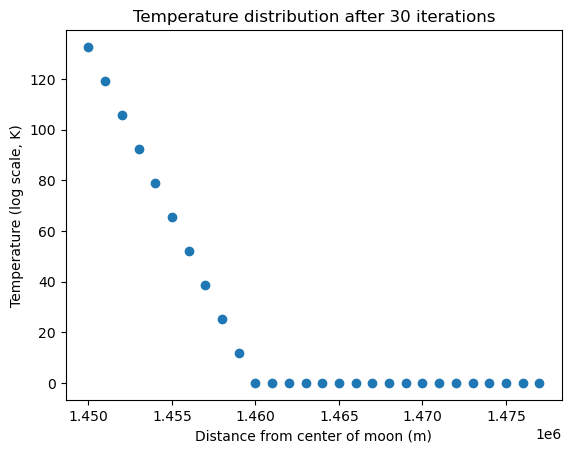

In [100]:
import matplotlib.pyplot as plt
plt.scatter(r_arr[0:28], np.log10(T_layer[0:28]))

plt.title("Temperature distribution after 30 iterations")
plt.xlabel("Distance from center of moon (m)")
plt.ylabel("Temperature (log scale, K)")

plt.savefig('../figs/T_distr', dpi=150)

# Start over

In [21]:
delta_t_layer = np.zeros(N)

for i in range(N):

    delta_t_layer[i] = get_c_p(0)*A_sphere[i]*delta_r*(273-100)/E_dot

In [22]:
delta_t_layer

array([1.70167516e+27, 1.70402310e+27, 1.70637267e+27, 1.70872386e+27,
       1.71107666e+27, 1.71343108e+27, 1.71578712e+27, 1.71814478e+27,
       1.72050406e+27, 1.72286496e+27, 1.72522747e+27, 1.72759161e+27,
       1.72995736e+27, 1.73232473e+27, 1.73469373e+27, 1.73706433e+27,
       1.73943656e+27, 1.74181041e+27, 1.74418588e+27, 1.74656296e+27,
       1.74894166e+27, 1.75132199e+27, 1.75370393e+27, 1.75608748e+27,
       1.75847266e+27, 1.76085946e+27, 1.76324788e+27, 1.76563791e+27,
       1.76802956e+27, 1.77042283e+27, 1.77281772e+27, 1.77521423e+27,
       1.77761236e+27, 1.78001211e+27, 1.78241347e+27, 1.78481646e+27,
       1.78722106e+27, 1.78962728e+27, 1.79203512e+27, 1.79444458e+27,
       1.79685566e+27, 1.79926835e+27, 1.80168267e+27, 1.80409860e+27,
       1.80651615e+27, 1.80893532e+27, 1.81135611e+27, 1.81377852e+27,
       1.81620255e+27, 1.81862819e+27, 1.82105546e+27, 1.82348434e+27,
       1.82591484e+27, 1.82834697e+27, 1.83078071e+27, 1.83321606e+27,
      

In [23]:
delta_t_layer

total_t = delta_t_layer.copy()

for i in range(1, N):
    total_t[i] += total_t[i-1]

total_t

array([1.70167516e+27, 3.40569826e+27, 5.11207093e+27, 6.82079479e+27,
       8.53187145e+27, 1.02453025e+28, 1.19610897e+28, 1.36792344e+28,
       1.53997385e+28, 1.71226035e+28, 1.88478309e+28, 2.05754225e+28,
       2.23053799e+28, 2.40377046e+28, 2.57723984e+28, 2.75094627e+28,
       2.92488993e+28, 3.09907097e+28, 3.27348955e+28, 3.44814585e+28,
       3.62304002e+28, 3.79817222e+28, 3.97354261e+28, 4.14915136e+28,
       4.32499862e+28, 4.50108457e+28, 4.67740936e+28, 4.85397315e+28,
       5.03077610e+28, 5.20781839e+28, 5.38510016e+28, 5.56262158e+28,
       5.74038282e+28, 5.91838403e+28, 6.09662538e+28, 6.27510702e+28,
       6.45382913e+28, 6.63279186e+28, 6.81199537e+28, 6.99143983e+28,
       7.17112539e+28, 7.35105223e+28, 7.53122049e+28, 7.71163035e+28,
       7.89228197e+28, 8.07317550e+28, 8.25431111e+28, 8.43568896e+28,
       8.61730922e+28, 8.79917204e+28, 8.98127758e+28, 9.16362602e+28,
       9.34621750e+28, 9.52905220e+28, 9.71213027e+28, 9.89545188e+28,
      

In [24]:
r_arr

array([1450000., 1451000., 1452000., 1453000., 1454000., 1455000.,
       1456000., 1457000., 1458000., 1459000., 1460000., 1461000.,
       1462000., 1463000., 1464000., 1465000., 1466000., 1467000.,
       1468000., 1469000., 1470000., 1471000., 1472000., 1473000.,
       1474000., 1475000., 1476000., 1477000., 1478000., 1479000.,
       1480000., 1481000., 1482000., 1483000., 1484000., 1485000.,
       1486000., 1487000., 1488000., 1489000., 1490000., 1491000.,
       1492000., 1493000., 1494000., 1495000., 1496000., 1497000.,
       1498000., 1499000., 1500000., 1501000., 1502000., 1503000.,
       1504000., 1505000., 1506000., 1507000., 1508000., 1509000.,
       1510000., 1511000., 1512000., 1513000., 1514000., 1515000.,
       1516000., 1517000., 1518000., 1519000., 1520000., 1521000.,
       1522000., 1523000., 1524000., 1525000., 1526000., 1527000.,
       1528000., 1529000., 1530000., 1531000., 1532000., 1533000.,
       1534000., 1535000., 1536000., 1537000., 1538000., 15390

In [25]:
r_vs_t = np.zeros((2, N))
r_vs_t[0] = total_t
r_vs_t[1] = r_arr
np.savetxt('../data/r_vs_t.csv', r_vs_t.transpose(), delimiter=',')